In [1]:
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
import datashader as ds
import colorcet as cc
import seaborn as sns
import numpy as np
from functions import *

ModuleNotFoundError: No module named 'datashader'

In [13]:
#TODO fix the graph
#TODO interphet the results
#TODO find outliers in scatterplot

In [3]:
%%time

posts = dt.fread("instagram_posts.csv", columns={"post_id", "numbr_likes", "number_comments", "cts"}).to_pandas()

Wall time: 4min 22s


<ipython-input-7-c441b6ecb362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts2['cts'] = pd.to_datetime(posts2['cts']).dt.time


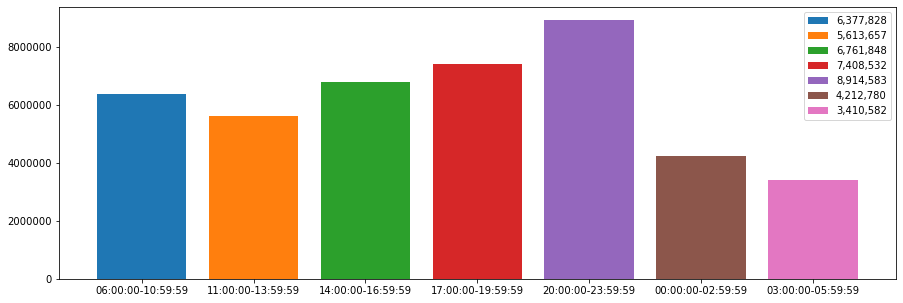

In [36]:
time_intervals([first_interval,second_interval,third_interval,fourth_interval,fifth_interval,sixth_interval,seventh_interval])

## Q8.1 Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

After reading the right column that we need for this exercises we plot the scatterplot

In [3]:
posts.head()

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80.0,0.0
1,BVg0pbolYBC,25.0,1.0
2,BRgkjcXFp3Q,9.0,0.0
3,BKTKeNhjEA7,4.0,0.0
4,8-NQrvoYLX,8.0,0.0


In [4]:
posts.shape

(42710197, 3)

In [5]:
posts = posts.dropna()

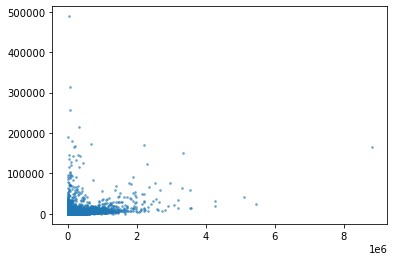

In [10]:
plt.scatter(posts['numbr_likes'], posts['number_comments'],s=3, alpha=0.5)
plt.show()

To have a better understanding of what we are trying to find (the correlation) we are gonna calculate the pearson correlation coefficient

In [11]:
posts.number_comments.corr(posts.numbr_likes)

0.3744527992482446

As we can see from the scatterplot above and the result value from the pearson correlation coefficient. If the number of likes were related to the number of comments then we would be seeing a proportional increase of both value, while from the scatterplot we see that at the increase of the number of likes, the number of comments doesnt increase.

In [14]:
#n_likes = posts.numbr_likes.apply(lambda x: x+1)
#n_likes_log = n_likes.apply(np.log)
#n_c = posts.number_comments.apply(lambda x: x+1)
#n_co = n_c.apply(np.log)
#plt.scatter(n_co, n_likes_log,s=3, alpha=0.5)
#plt.show()

## Let's try seaborn

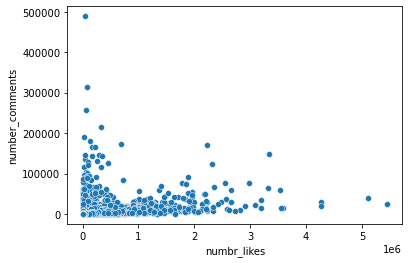

In [12]:
sns.scatterplot(data=posts, x = posts['numbr_likes'], y=posts['number_comments'])
plt.show()

## Q8.2 Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [5]:

from datetime import datetime

In [32]:
#lets convert to datetime
posts['cts']=pd.to_datetime(posts['cts'])

#We want to work only on the hours of the publication, not the dates
posts['h'] = posts['cts'].dt.time

# Let's find the pearson correlation between the feature in our df
posts.corr() 

,numbr_likes,number_comments
numbr_likes,1.000000,0.374453
number_comments,0.374453,1.000000


As We can see there is almost zero correlation between number of likes and the hour, same goes for the number of comments.
The values are respectivly 0.001154 for the number of likes, and 0.000506 for the number of comments. So there is almost zero correlation.

TypeError: float() argument must be a string or a number, not 'datetime.time'

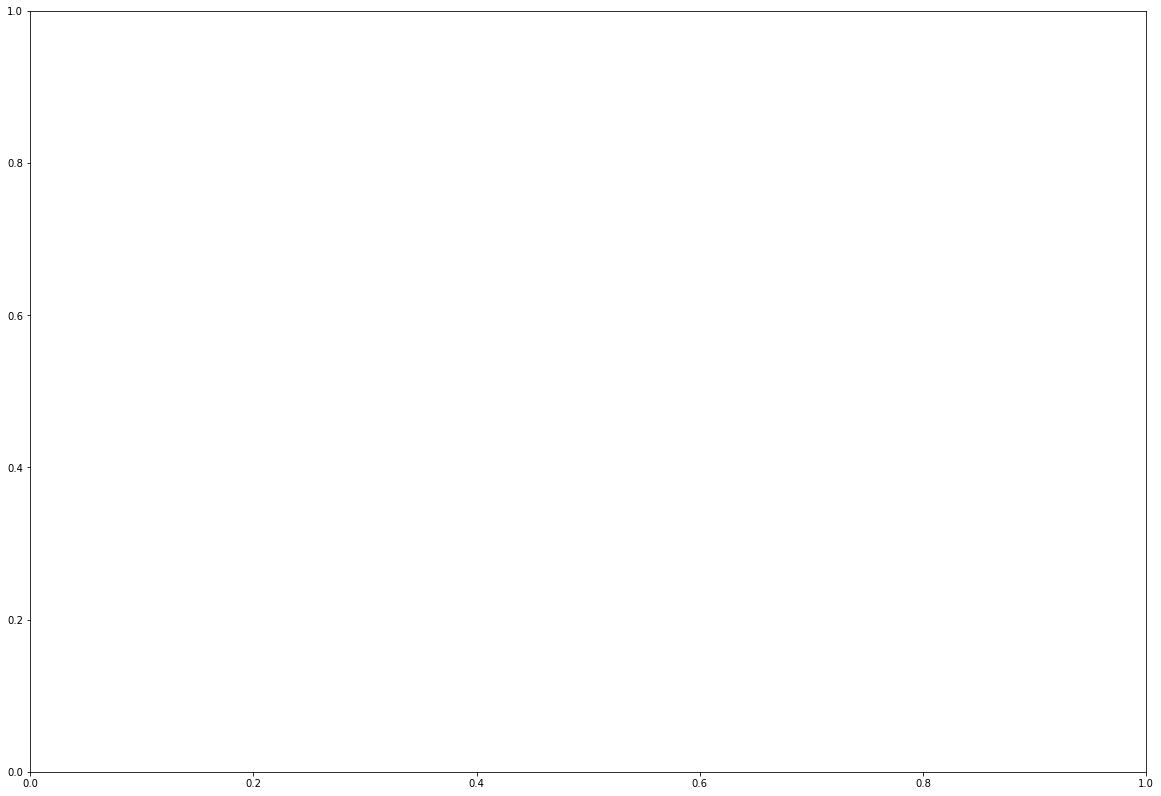

In [34]:
#Let's plot the number of likes
x=posts['h']
y=posts['numbr_likes']

fig = plt.figure(figsize =(20, 14))
plt.scatter(x,y)

plt.xlim=([0,24])
plt.xlabel('Hours of the day')
plt.ylabel('#Likes by hour')
plt.show()

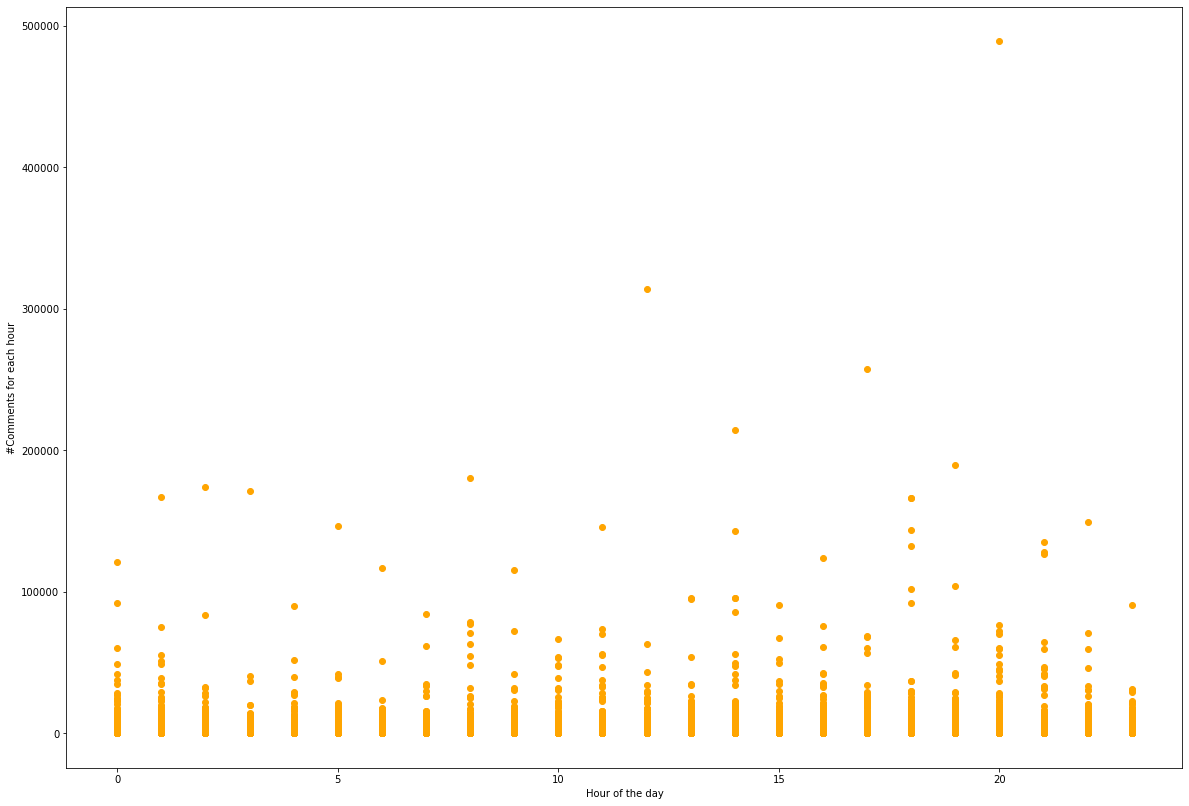

In [28]:
#Let's plot the number of comments
x=posts['h']
y=posts['number_comments']

fig = plt.figure(figsize =(20, 14))
plt.scatter(x,y, color="orange")

plt.xlim=([0,24])
plt.xlabel('Hour of the day')
plt.ylabel('#Comments for each hour')
plt.show()

## Q8.3 What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [4]:
%%time

profiles = dt.fread("instagram_profiles.csv").to_pandas()

CPU times: total: 16.7 s
Wall time: 7.77 s


In [18]:
followers = profiles['followers']
#lets drop the Na
followers = followers.dropna()



Per avere una maggiore interpretabilità della distribuzione usiamo la scala logaritmica, però abbiamo moltissimi valori = 0. Per risolvere questo problema prima aumentiamo tutti i valori di 1, in questa maniera non avremo più valori uguali a zero e allo stesso tempo la distribuzione rimane invariata.

Successivamente plottiamo

In [26]:
f_plus_1 = followers.apply(lambda x: x+1)
followers_log = f_plus_1.apply(np.log)

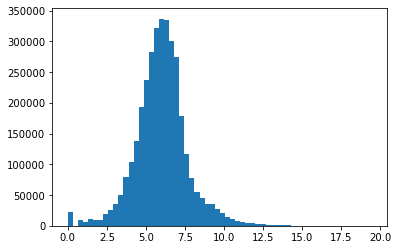

In [34]:
plt.hist(followers_log, bins=60)
plt.show()

<AxesSubplot:xlabel='followers', ylabel='Count'>

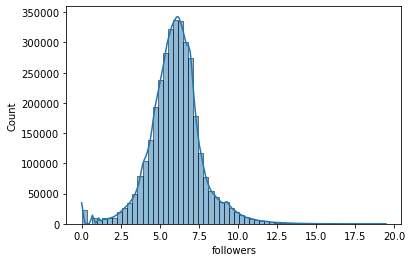

In [44]:
#lets plot the density function of the distribution of followers
sns.histplot( ciao , kde = True, bins=60)

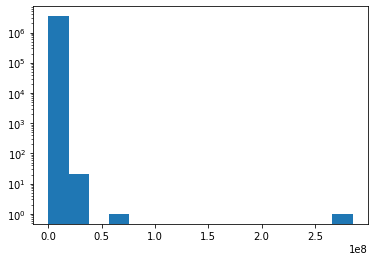

In [20]:
plt.hist(followers, log=True, bins=15)
plt.show()

In [17]:
followers = profiles[profiles.followers < 30000] 
followers.followers.max()

29999.0

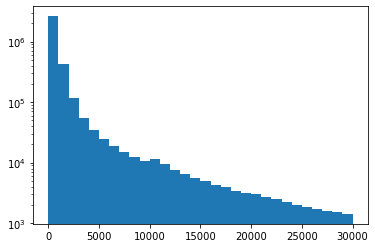

In [18]:
plt.hist(followers.followers, log = True, bins=30)
plt.show()

In [33]:
profiles.followers.describe()

count    3.452771e+06
mean     4.739899e+03
std      1.939087e+05
min      0.000000e+00
25%      1.590000e+02
50%      4.060000e+02
75%      9.740000e+02
max      2.854576e+08
Name: followers, dtype: float64

In [21]:
profiles.mean()